# Problem Statement

The Tunisian Company of Electricity and Gas (STEG) is a public and a non-administrative company, 
it is responsible for delivering electricity and gas across Tunisia. The company suffered tremendous 
losses in the order of 200 million Tunisian Dinars due to fraudulent manipulations of meters by 
consumers. Using the client’s billing history, the aim of the challenge is to detect and recognize clients 
involved in fraudulent activities.
The solution will enhance the company’s revenues and reduce the losses caused by such fraudulent 
activities.

# Description of dataset

The data provided by STEG is composed of two files. The first one is comprised of client data and the 
second one contains billing history since 2005.
The data inputs are Client.csv which has information about client like ID, Category, Location, account 
creation date and Target (Fraud or not) and Invoice.csv which has invoice information like Client ID, 
Invoice date, Tarif type, Consumption detail and Month detail.
Dataset Source: Fraud Detection in Electricity and Gas Consumption Data - ZINDI

# Variable definitions

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
# low memory is set to false to avoid  warnings - Since we have huge amount of data
client_train = pd.read_csv("client_train.csv", low_memory=False)
invoice_train = pd.read_csv('invoice_train.csv', low_memory=False)

In [33]:
client_train.sample(10)

,disrict,client_id,client_catg,region,creation_date,target
12639,60,train_Client_111371,11,101,24/03/2010,0.0
96335,69,train_Client_64756,51,103,02/03/2016,0.0
33211,60,train_Client_129888,11,101,10/10/2016,0.0
75340,60,train_Client_45860,11,101,16/10/1997,0.0
39170,62,train_Client_13525,11,301,16/06/2008,0.0
88997,60,train_Client_58151,11,101,10/10/2013,0.0
99942,63,train_Client_68001,11,312,20/09/1990,0.0
104116,62,train_Client_71759,11,310,07/02/2002,0.0
21375,62,train_Client_119234,11,304,22/08/2014,0.0
40679,60,train_Client_14665,51,101,04/05/2013,0.0


In [34]:
client_train.describe().T

,count,mean,std,min,25%,50%,75%,max
disrict,135493.0,63.511222,3.354400,60.0,62.0,62.0,69.0,69.0
client_catg,135493.0,11.512506,4.423761,11.0,11.0,11.0,11.0,51.0
region,135493.0,206.159809,104.207044,101.0,103.0,107.0,307.0,399.0
target,135493.0,0.055841,0.229614,0.0,0.0,0.0,0.0,1.0


In [35]:
invoice_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tarif_type,4476749.0,2.012804e+01,1.347256e+01,8.0,11.0,11.0,40.0,4.500000e+01
counter_number,4476749.0,1.230587e+11,1.657267e+12,0.0,121108.0,494561.0,1115161.0,2.798115e+13
counter_code,4476749.0,1.724884e+02,1.338871e+02,0.0,5.0,203.0,207.0,6.000000e+02
reading_remarque,4476749.0,7.321702e+00,1.571654e+00,5.0,6.0,8.0,9.0,4.130000e+02
counter_coefficient,4476749.0,1.003040e+00,3.083466e-01,0.0,1.0,1.0,1.0,5.000000e+01
consommation_level_1,4476749.0,4.109795e+02,7.573080e+02,0.0,79.0,274.0,600.0,9.999100e+05
consommation_level_2,4476749.0,1.093225e+02,1.220123e+03,0.0,0.0,0.0,0.0,9.990730e+05
consommation_level_3,4476749.0,2.030620e+01,1.574239e+02,0.0,0.0,0.0,0.0,6.449200e+04
consommation_level_4,4476749.0,5.292588e+01,8.754725e+02,0.0,0.0,0.0,0.0,5.479460e+05
old_index,4476749.0,1.776700e+04,4.036693e+04,0.0,1791.0,7690.0,21660.0,2.800280e+06


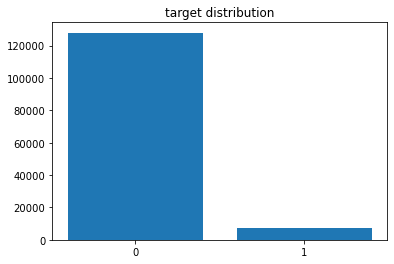

In [36]:
ds = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

We can see that there is huge imbalance in the target column, So we will be generating synthetic minority class oversampling

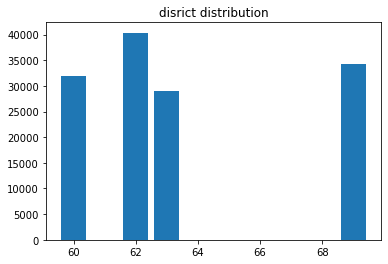

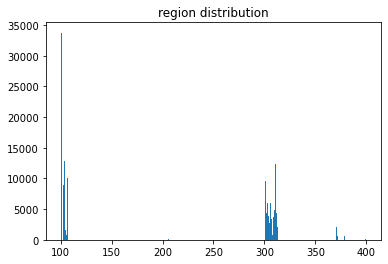

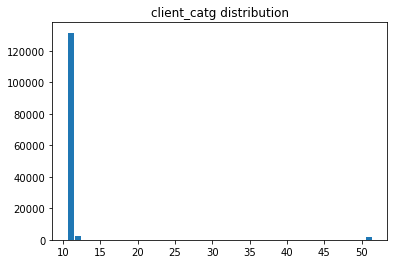

In [37]:
# Data distribution for columns 'disrict','region','client_catg'
for col in ['disrict','region','client_catg']:
    ds = client_train.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

In [38]:
#Label encoding the counter_type - Electricity : 0 and Gas : 1
d={"ELEC":0,"GAZ":1}
invoice_train['counter_type']=invoice_train['counter_type'].map(d)

In [39]:
client_train['client_catg'] = client_train['client_catg'].astype('object')
client_train['disrict'] = client_train['disrict'].astype('object')

client_train['client_catg'] = client_train['client_catg'].astype('object')
client_train['disrict'] = client_train['disrict'].astype('object')

In [40]:
invoice_train['counter_type'].value_counts()

0    3079406
1    1397343
Name: counter_type, dtype: int64

In [41]:
#changing the invoice date to datetime - 
for df in [invoice_train]:
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [42]:
#we groupby the invoice data according to the client_id then we take the mean of the consommation_levels for each client
aggs = {}
aggs['consommation_level_1'] = ['mean']
aggs['consommation_level_2'] = ['mean']
aggs['consommation_level_3'] = ['mean']
aggs['consommation_level_4'] = ['mean']

In [43]:
agg_trans = invoice_train.groupby(['client_id']).agg(aggs)
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)
df = (invoice_train.groupby('client_id').size().reset_index(name='{}transactions_count'.format('1')))
agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')

In [44]:
agg_trans.head()

,client_id,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,train_Client_0,35,352.400000,10.571429,0.000000,0.000000
1,train_Client_1,37,557.540541,0.000000,0.000000,0.000000
2,train_Client_10,18,798.611111,37.888889,0.000000,0.000000
3,train_Client_100,20,1.200000,0.000000,0.000000,0.000000
4,train_Client_1000,14,663.714286,104.857143,117.357143,36.714286


In [45]:
#Now, we just merge this with out train data
train = pd.merge(client_train,agg_trans, on='client_id', how='left')

In [46]:
train

,disrict,client_id,client_catg,region,creation_date,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,60,train_Client_0,11,101,31/12/1994,0.0,35,352.400000,10.571429,0.000000,0.000000
1,69,train_Client_1,11,107,29/05/2002,0.0,37,557.540541,0.000000,0.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,18,798.611111,37.888889,0.000000,0.000000
3,69,train_Client_100,11,105,11/07/1996,0.0,20,1.200000,0.000000,0.000000,0.000000
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0,71,1.957746,0.000000,0.000000,0.000000
135489,63,train_Client_99996,11,311,25/10/2012,0.0,41,185.853659,0.756098,0.000000,0.000000
135490,63,train_Client_99997,11,311,22/11/2011,0.0,36,273.083333,0.000000,0.000000,0.000000
135491,60,train_Client_99998,11,101,22/12/1993,0.0,2,300.000000,70.500000,0.000000,0.000000


In [47]:
agg_trans = invoice_train.groupby(['client_id']).agg(aggs)
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)

df = (invoice_train.groupby('client_id').size().reset_index(name='{}transactions_count'.format('1')))

agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')

In [48]:
train.sample(5)

,disrict,client_id,client_catg,region,creation_date,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
73418,63,train_Client_4413,11,311,10/05/2002,1.0,71,251.253521,5.690141,4.732394,0.0
26460,60,train_Client_123810,11,101,09/09/1999,0.0,32,499.687500,14.500000,0.000000,0.0
6147,62,train_Client_105529,11,301,11/09/1980,0.0,1,0.000000,0.000000,0.000000,0.0
18334,60,train_Client_116498,11,101,26/12/1993,0.0,28,127.535714,92.321429,0.000000,0.0
72159,60,train_Client_42998,11,101,02/05/1980,0.0,31,25.903226,0.000000,0.000000,0.0


In [49]:
train.shape

(135493, 11)

In [50]:
# To check the unique value - to see if we have to drop any column
d={}
for col,uniq_val in train.nunique().items():
    d[col]=uniq_val
print(sorted(d.items(), key=lambda item: item[1], reverse=True))

[('client_id', 135493), ('consommation_level_1_mean', 94937), ('consommation_level_2_mean', 51696), ('consommation_level_3_mean', 26573), ('consommation_level_4_mean', 16247), ('creation_date', 8088), ('1transactions_count', 260), ('region', 25), ('disrict', 4), ('client_catg', 3), ('target', 2)]


We can see that the Client_id column is unique so we drop it, becuase it is not going to help in the prediction

In [51]:
col_to_drop = ['client_id']
for col in col_to_drop:
    if col in train.columns:
        train.drop([col], axis=1, inplace=True)

In [54]:
train['creation_date'] = pd.to_datetime(train['creation_date'])

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135493 entries, 0 to 135492
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   disrict                    135493 non-null  object        
 1   client_catg                135493 non-null  object        
 2   region                     135493 non-null  int64         
 3   creation_date              135493 non-null  datetime64[ns]
 4   target                     135493 non-null  float64       
 5   1transactions_count        135493 non-null  int64         
 6   consommation_level_1_mean  135493 non-null  float64       
 7   consommation_level_2_mean  135493 non-null  float64       
 8   consommation_level_3_mean  135493 non-null  float64       
 9   consommation_level_4_mean  135493 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 11.4+ MB


In [56]:
#Label Encoding
from sklearn import preprocessing
for f in train.columns:
    if train[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f] = lbl.transform(list(train[f].values))

In [57]:
train.isnull().sum()

disrict                      0
client_catg                  0
region                       0
creation_date                0
target                       0
1transactions_count          0
consommation_level_1_mean    0
consommation_level_2_mean    0
consommation_level_3_mean    0
consommation_level_4_mean    0
dtype: int64

In [58]:
# Set X and y
target=train['target']
train.drop('target',axis=1,inplace=True)
y = target
X = train

In [59]:
# we keep the month and the year data from creation date - for the analysis and oversampling purpose
X['creation_month'] = X['creation_date'].apply(lambda x: str(x)[5:7])
X['creation_year'] = X['creation_date'].apply(lambda x: str(x)[:4])

In [60]:
X.drop('creation_date',axis=1,inplace=True)

In [61]:
# Datatype of the Month and Year is changed to int - for Synthetic oversampling
X['creation_month'] = X['creation_month'].astype(int)
X['creation_year'] = X['creation_year'].astype(int)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135493 entries, 0 to 135492
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_catg                135493 non-null  int64  
 2   region                     135493 non-null  int64  
 3   1transactions_count        135493 non-null  int64  
 4   consommation_level_1_mean  135493 non-null  float64
 5   consommation_level_2_mean  135493 non-null  float64
 6   consommation_level_3_mean  135493 non-null  float64
 7   consommation_level_4_mean  135493 non-null  float64
 8   creation_month             135493 non-null  int32  
 9   creation_year              135493 non-null  int32  
dtypes: float64(4), int32(2), int64(4)
memory usage: 10.3 MB


<AxesSubplot:>

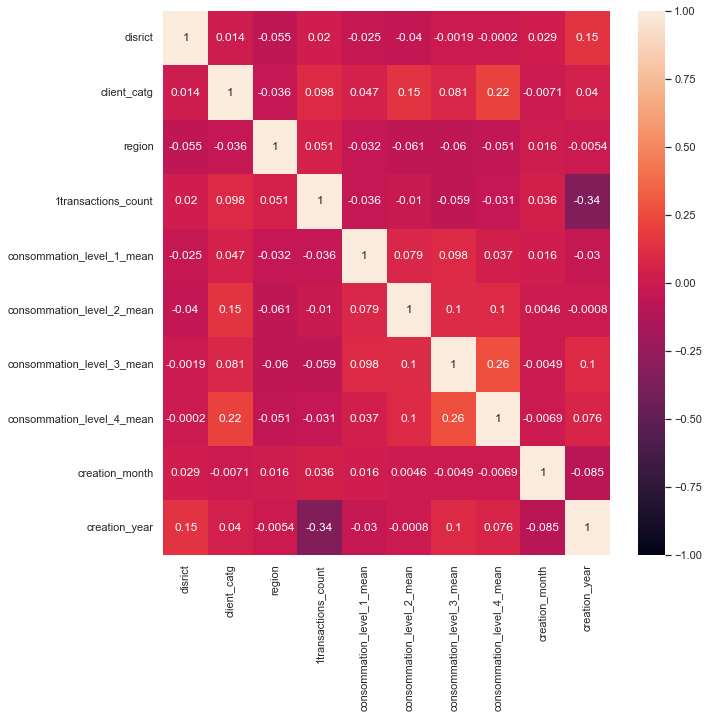

In [66]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(X.corr(), annot=True,vmin=-1,vmax=1)

We don't see any strong correalation between any column pairs so we don't have to reduce any furthur dimensions

In [67]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=123)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (135493, 10)
Shape of X after SMOTE: (255854, 10)

Balance of positive and negative classes (%):


0.0    50.0
1.0    50.0
Name: target, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
# Splitting the data in 70% for train and 30% for test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=123)

{'C': 2, 'max_iter': 150, 'random_state': 42, 'solver': 'liblinear'}
Accuracy score : 0.62
Recall score : 0.62
Precision score : 0.61
F1 score : 0.62


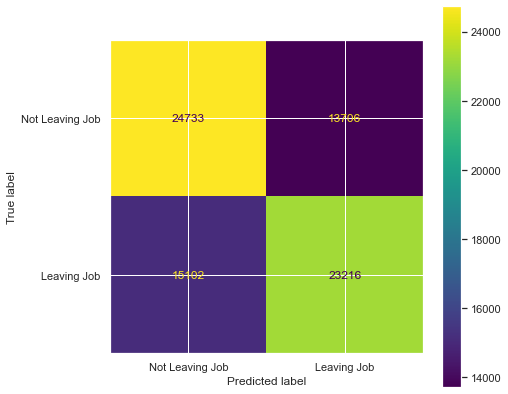

In [80]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.01, 0.1,0.2,0.25,0.3,0.4, 1, 2],'max_iter': [150,200,250, 300, 1000,1500], 'random_state':[42], 'solver':['liblinear'] } 
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, param_grid, cv=10)
lr_cv.fit(X_train, y_train)
print(lr_cv.best_params_)
lrpre=lr_cv.predict(X_test)
lrcm = confusion_matrix(y_test,lrpre)
#print(lr_cv.score(X_test, Y_test))
print("Accuracy score : {:.2f}".format(accuracy_score(lrpre,y_test)))
print("Recall score : {:.2f}".format(recall_score(lrpre,y_test,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(lrpre,y_test,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(lrpre,y_test,zero_division=True)))
dis = ConfusionMatrixDisplay(lrcm,display_labels=["Not Leaving Job","Leaving Job"])
dis.plot()
plt.show()

{'n_neighbors': 4, 'p': 1}
Accuracy score : 0.90
Recall score : 0.91
Precision score : 0.98
F1 score : 0.91


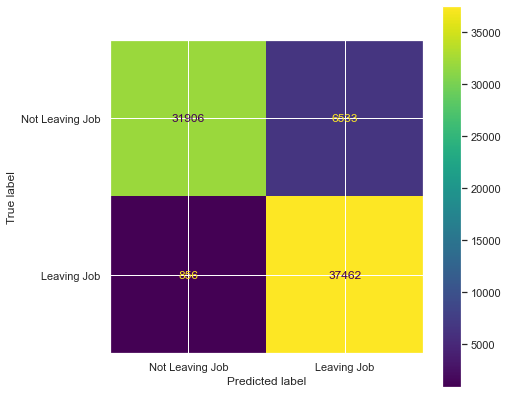

In [83]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': np.arange(3,10), 'p':[1,2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
knnpre = knn_cv.predict(X_test)
knncm = confusion_matrix(y_test,knnpre)
print("Accuracy score : {:.2f}".format(accuracy_score(knnpre,y_test)))
print("Recall score : {:.2f}".format(recall_score(knnpre,y_test,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(knnpre,y_test,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(knnpre,y_test,zero_division=True)))
dis = ConfusionMatrixDisplay(knncm,display_labels=["Not Leaving Job","Leaving Job"])
dis.plot()
plt.show()

In [84]:
# it is no surprise KNN performs very well, because we have used SMOTE to create a large set of data points synthetically

{'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 8, 'n_estimators': 50}
Accuracy score : 0.75
Recall score : 0.75
Precision score : 0.80
F1 score : 0.76


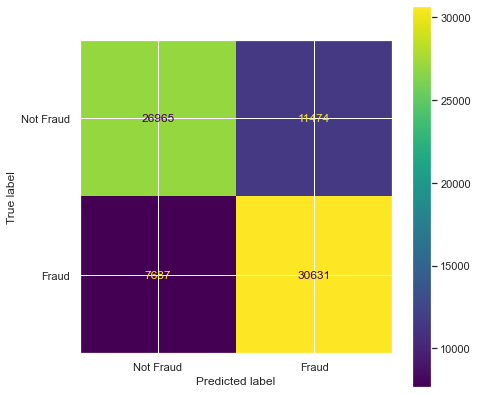

In [91]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[25,50,75],'max_features': [3,4,5], 'max_depth':[5,6,7], 'min_samples_leaf':[8,9,10,11]} 
rf = RandomForestClassifier(n_jobs=-1)
rf_cv =  GridSearchCV(rf, param_grid)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
rfpre = rf_cv.predict(X_test)
#print(rf_cv.score(X_test, Y_test))
rfcm = confusion_matrix(y_test,rfpre)
print("Accuracy score : {:.2f}".format(accuracy_score(rfpre,y_test)))
print("Recall score : {:.2f}".format(recall_score(rfpre,y_test,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(rfpre,y_test,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(rfpre,y_test,zero_division=True)))
dis = ConfusionMatrixDisplay(rfcm,display_labels=["Not Fraud","Fraud"])
dis.plot()
plt.show()

{'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 10}
Accuracy score : 0.73
Recall score : 0.73
Precision score : 0.77
F1 score : 0.74


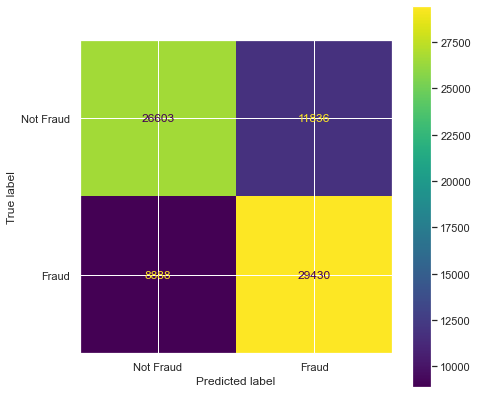

In [89]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': [3,4,5], 'max_depth':[5,6,7,8], 'min_samples_leaf':[8,9,10,11]} 
dt = DecisionTreeClassifier()
dt_cv =  GridSearchCV(dt, param_grid)
dt_cv.fit(X_train, y_train)
print(dt_cv.best_params_)
dtpre = dt_cv.predict(X_test)
#print(dt_cv.score(X_test, Y_test))
dtcm = confusion_matrix(y_test,dtpre)
print("Accuracy score : {:.2f}".format(accuracy_score(dtpre,y_test)))
print("Recall score : {:.2f}".format(recall_score(dtpre,y_test,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(dtpre,y_test,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(dtpre,y_test,zero_division=True)))
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Not Fraud","Fraud"])
dis.plot()
plt.show()

In [111]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Creating an object for model and fitting it on training data set
model = LGBMClassifier(boosting_type='gbdt', class_weight=None, learning_rate=0.2, n_estimators=5000)
model.fit(X_train, y_train)
 
# Predicting the Target variable
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9356931615357557


Accuracy score : 0.94
Recall score : 0.94
Precision score : 0.96
F1 score : 0.94


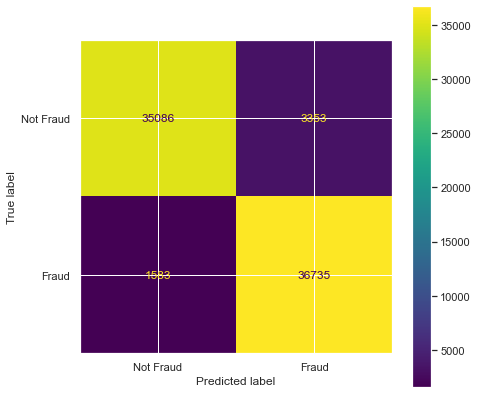

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score,ConfusionMatrixDisplay,roc_auc_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
sns.set(rc={'figure.figsize':(7,7)})
print("Accuracy score : {:.2f}".format(accuracy_score(pred,y_test)))
print("Recall score : {:.2f}".format(recall_score(pred,y_test,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(pred,y_test,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(pred,y_test,zero_division=True)))
disp = plot_confusion_matrix(model,X_test,y_test,display_labels=["Not Fraud","Fraud"])
plt.show()

